In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df1=pd.read_excel('Email Raw Data_encrypted.xlsx',sheet_name='Sep-NA',encoding='ISO-8859-1')

In [3]:
df1.head()

,ConversationID,Subject,Sender_email,Sender_alias,Sender_name,FolderName,DateTimeReceived,ToLine,CCLine,Date,...,ToLine2,ToLine3,ToLine4,ToLine5,ToLine6,ToLine7,ToLine8,ToLine9,ToLine10,ToLine11
0,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,PO# 99523669 // DocuSign Reminder 01 Supplier ...,v-mahawa@microsoft.com,v-mahawa,Manoj Hawal,NaN,2020-09-24T15:24:02+00:00,raman.v@tcs.com,shumaelr@microsoft.com;v-akaul@microsoft.com;v...,2020-09-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,RE: Signature required _ LINXTELECOM_ TRIM.20...,v-parche@microsoft.com,v-parche,Param Chengappa,NaN,2020-09-24T16:37:31+00:00,v-olsob@microsoft.com;zhtileum@microsoft.com;v...,Kristina.Tikhonova@microsoft.com;David.Cheung@...,2020-09-24,...,zhtileum,v-phjaco,Vicki.Hamblin,David.Finnerty,NaN,NaN,NaN,NaN,NaN,NaN
2,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,RE: VSO# 435472// DocuSign Reminder 03 Supplie...,v-pushs@microsoft.com,v-pushs,Pushpendra Singh,NaN,2020-09-24T17:12:06+00:00,george.dellarocca@bmo.com,ccpe@microsoft.com;Jorge.Florez@microsoft.com;...,2020-09-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,99520574// DWT Review Requested// EdgeConneX Inc,v-shipaw@microsoft.com,v-shipaw,Shivani Pawar,NaN,2020-09-24T17:32:40+00:00,Neda.Vassey@microsoft.com,ccpe@microsoft.com,2020-09-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAQkADhlNzNmMWQ5LTNkNDMtNDdkNC1iMGM0LTk3Y2U5N2...,RE: PO 99513289 PO 99526062 PO 99526073 PO 995...,v-lashir@microsoft.com,v-lashir,Lalit Shirore,NaN,2020-09-24T17:42:21+00:00,niwhit@microsoft.com;Bjorn.Johnson@microsoft.c...,ccpe@microsoft.com,2020-09-24,...,Bjorn.Johnson,v-niingo,v-pakotu,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ConversationID       2288 non-null   object        
 1   Subject              2288 non-null   object        
 2   Sender_email         2288 non-null   object        
 3   Sender_alias         2288 non-null   object        
 4   Sender_name          2288 non-null   object        
 5   FolderName           0 non-null      float64       
 6   DateTimeReceived     2288 non-null   object        
 7   ToLine               2280 non-null   object        
 8   CCLine               2265 non-null   object        
 9   Date                 2288 non-null   datetime64[ns]
 10  DatetimeReceivedPST  2288 non-null   object        
 11  IsComplete           0 non-null      float64       
 12  CompletedDate        0 non-null      float64       
 13  CompletedBy          0 non-null  

In [5]:
df1.columns

Index(['ConversationID', 'Subject', 'Sender_email', 'Sender_alias',
       'Sender_name', 'FolderName', 'DateTimeReceived', 'ToLine', 'CCLine',
       'Date', 'DatetimeReceivedPST', 'IsComplete', 'CompletedDate',
       'CompletedBy', 'Category', 'StartTime', 'ReplyTime', 'Scored Labels',
       'ToLine1', 'ToLine2', 'ToLine3', 'ToLine4', 'ToLine5', 'ToLine6',
       'ToLine7', 'ToLine8', 'ToLine9', 'ToLine10', 'ToLine11'],
      dtype='object')

In [6]:
#Seperate out only required columns
col=['Sender_alias','Scored Labels','ToLine1', 'ToLine2', 'ToLine3', 'ToLine4', 'ToLine5', 'ToLine6', 
     'ToLine7', 'ToLine8', 'ToLine9','ToLine10', 'ToLine11','Sender_name']

In [7]:
df2=df1[col]

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sender_alias   2288 non-null   object
 1   Scored Labels  2288 non-null   object
 2   ToLine1        2280 non-null   object
 3   ToLine2        828 non-null    object
 4   ToLine3        315 non-null    object
 5   ToLine4        118 non-null    object
 6   ToLine5        53 non-null     object
 7   ToLine6        23 non-null     object
 8   ToLine7        10 non-null     object
 9   ToLine8        2 non-null      object
 10  ToLine9        1 non-null      object
 11  ToLine10       1 non-null      object
 12  ToLine11       1 non-null      object
 13  Sender_name    2288 non-null   object
dtypes: object(14)
memory usage: 250.4+ KB


In [9]:
df2.rename(columns={'Scored Labels':'Email_Category'},inplace=True)

## First Phase of Analysis----Email Categorization

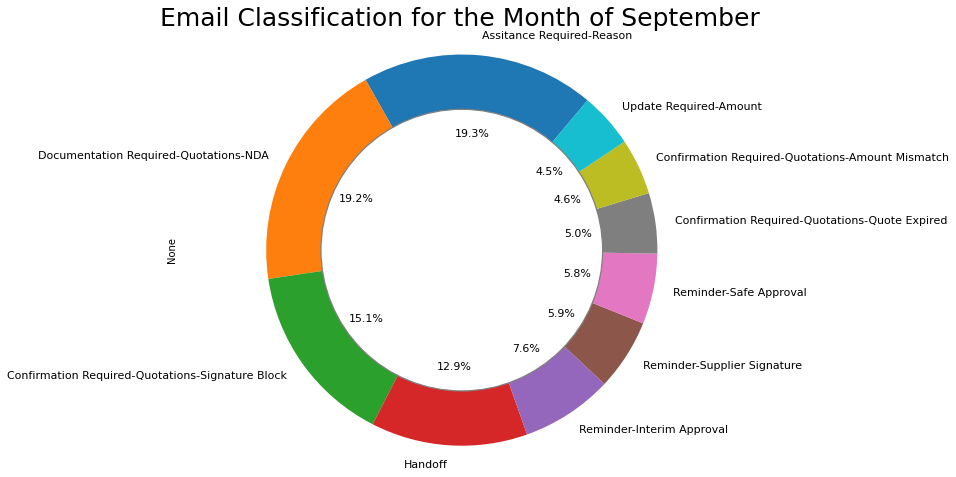

In [10]:
#Lets see which category wise distribusion
df2.Email_Category.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(
    figsize=(10,8),startangle=50,autopct='%1.1f%%',fontsize=11)
plt.title("Email Classification for the Month of September",fontsize=25)

centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

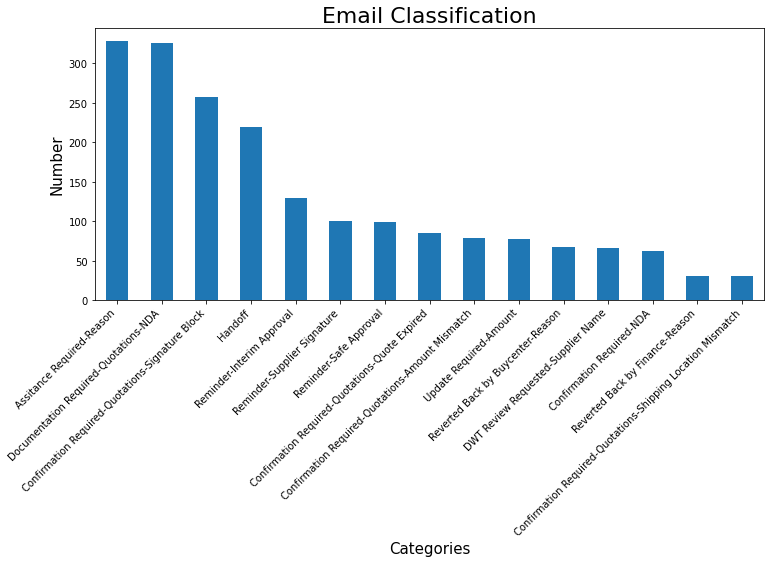

In [11]:
df2['Email_Category'].value_counts().nlargest(15).plot.bar(figsize=(12,5))
plt.title("Email Classification",fontsize=22)
plt.ylabel("Number",fontsize=15,rotation=90)
plt.xlabel("Categories",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

### Second Phase of Analysis--- Email Recipients

In [12]:
#Seperate out only required columns
col2=['Email_Category','ToLine1', 'ToLine2', 'ToLine3', 'ToLine4', 'ToLine5']

df3=df2[col2]

In [13]:
df3.head()

,Email_Category,ToLine1,ToLine2,ToLine3,ToLine4,ToLine5
0,Reminder-Safe Approval,raman.v,NaN,NaN,NaN,NaN
1,Assitance Required-Reason,v-olsob,zhtileum,v-phjaco,Vicki.Hamblin,David.Finnerty
2,Reminder-Supplier Signature,george.dellarocca,NaN,NaN,NaN,NaN
3,DWT Review Requested-Supplier Name,Neda.Vassey,NaN,NaN,NaN,NaN
4,Documentation Required-Quotations-Deal Summary,niwhit,Bjorn.Johnson,v-niingo,v-pakotu,NaN


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Email_Category  2288 non-null   object
 1   ToLine1         2280 non-null   object
 2   ToLine2         828 non-null    object
 3   ToLine3         315 non-null    object
 4   ToLine4         118 non-null    object
 5   ToLine5         53 non-null     object
dtypes: object(6)
memory usage: 107.4+ KB


In [15]:
df3.dropna(subset=['ToLine1'],inplace=True)

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 2287
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Email_Category  2280 non-null   object
 1   ToLine1         2280 non-null   object
 2   ToLine2         828 non-null    object
 3   ToLine3         315 non-null    object
 4   ToLine4         118 non-null    object
 5   ToLine5         53 non-null     object
dtypes: object(6)
memory usage: 124.7+ KB


In [17]:
#Converting Multiple ToLines into rows
df4 = (df3.set_index(["Email_Category"]).stack().reset_index())
df4.head()

,Email_Category,level_1,0
0,Reminder-Safe Approval,ToLine1,raman.v
1,Assitance Required-Reason,ToLine1,v-olsob
2,Assitance Required-Reason,ToLine2,zhtileum
3,Assitance Required-Reason,ToLine3,v-phjaco
4,Assitance Required-Reason,ToLine4,Vicki.Hamblin


In [18]:
df4.rename( columns={0:'Recipient'}, inplace=True )

In [19]:
df4.columns

Index(['Email_Category', 'level_1', 'Recipient'], dtype='object')

In [20]:
df4.tail()

,Email_Category,level_1,Recipient
3589,Update Required-Quotations-Company Code,ToLine1,Connor.Langridge
3590,Assitance Required-Reason,ToLine1,yvkwan
3591,Reverted Back by Buycenter-Reason,ToLine1,Robin.Maffeo
3592,Confirmation Required-Quotations-Amount Mismatch,ToLine1,Ricardo.Romagnoli
3593,Confirmation Required-Quotations-Amount Mismatch,ToLine2,v-sujoy


In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Email_Category  3594 non-null   object
 1   level_1         3594 non-null   object
 2   Recipient       3594 non-null   object
dtypes: object(3)
memory usage: 84.4+ KB


In [22]:
exceptions=pd.read_csv('Exception_Alias_List.csv')
exceptions.head()

,Sender_email,Sender_alias,Sender_name2,Sender_name
0,v-lashir@microsoft.com,v-lashir,Lalit Shirore,Lalit Shirore
1,v-mahawa@microsoft.com,v-mahawa,Manoj Hawal,Manoj Hawal
2,v-anraga@microsoft.com,v-anraga,Ananda,Ananda
3,v-anzede@microsoft.com,v-anzede,Anushree Zedek,Anushree Zedek
4,v-erifow@microsoft.com,v-erifow,Eric Fowler,Eric Fowler


In [23]:
exception_alias_list = exceptions["Sender_alias"].tolist()
Recipient_list= df4['Recipient'].tolist()

In [24]:
#Exceptions
df4=df4[df4['Recipient']!='v-pakotu']
df4=df4[df4['Recipient']!='v-erifow']
df4=df4[df4['Recipient']!='BuydeskTCSOffhsore']
df4=df4[df4['Recipient']!='v-anraga']
df4=df4[df4['Recipient']!='v-ribenj']
df4=df4[df4['Recipient']!='v-vamote']
df4=df4[df4['Recipient']!='v-nigulh']

In [25]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 0 to 3593
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Email_Category  3235 non-null   object
 1   level_1         3235 non-null   object
 2   Recipient       3235 non-null   object
dtypes: object(3)
memory usage: 101.1+ KB


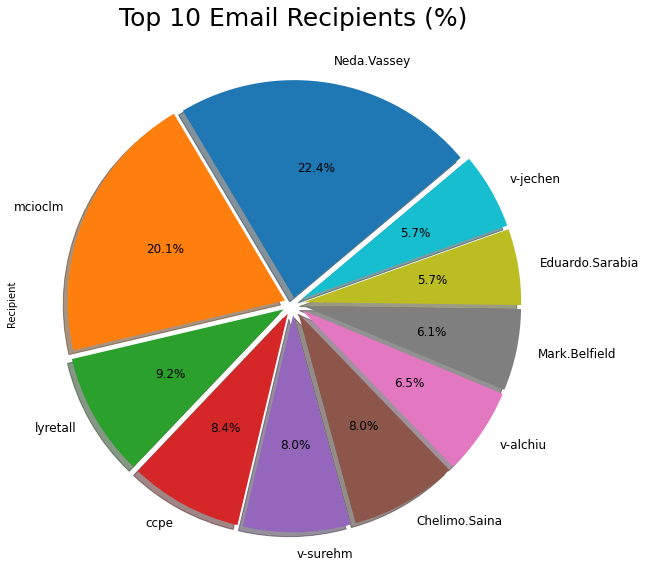

In [26]:
df4["Recipient"].value_counts()[:10].plot.pie(figsize=(12,10),
                                                explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
                                                shadow=True, startangle=40,autopct='%1.1f%%',fontsize=12)
plt.title("Top 10 Email Recipients (%)",fontsize=25)
plt.show()

### Top 3 Category Specific Recipients

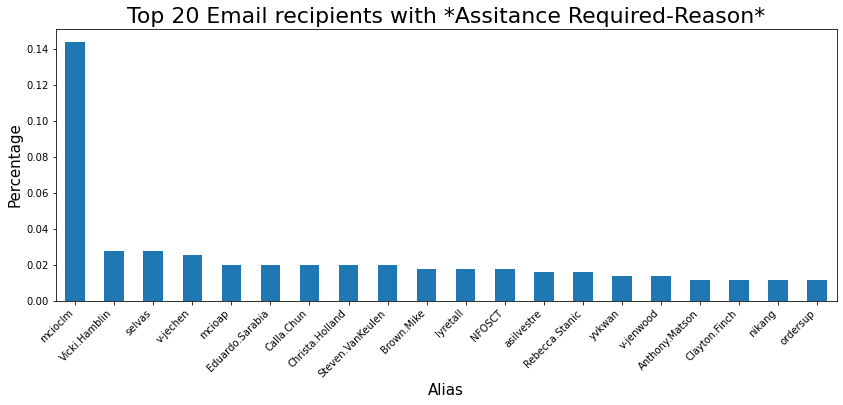

In [27]:
rds= df4[df4['Email_Category']=='Assitance Required-Reason']
rds['Recipient'].value_counts(normalize=True).nlargest(20).plot.bar(figsize=(14,5))
plt.title("Top 20 Email recipients with *Assitance Required-Reason*",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

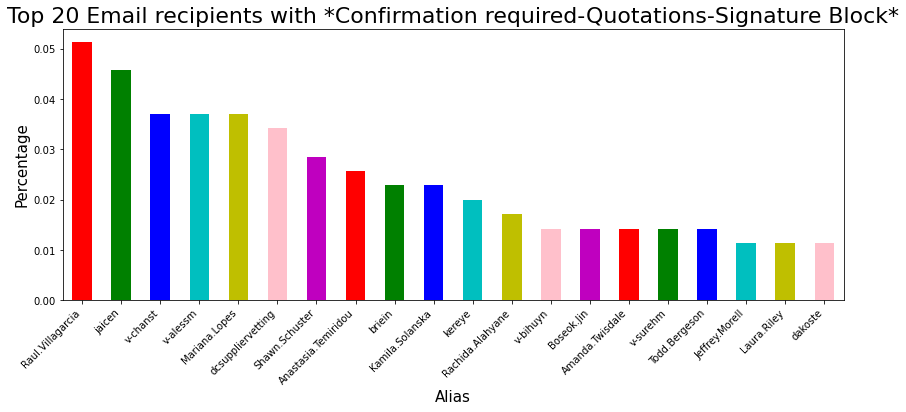

In [28]:
cqs= df4[df4['Email_Category']=='Confirmation Required-Quotations-Signature Block']
cqs['Recipient'].value_counts(normalize=True).nlargest(20).plot.bar(figsize=(14,5),color=["r","g","b","c","y","pink","m"])
plt.title("Top 20 Email recipients with *Confirmation required-Quotations-Signature Block*",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

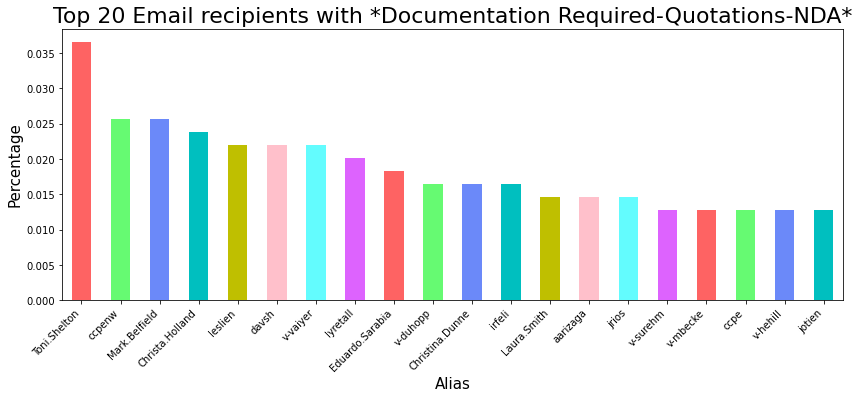

In [29]:
dqn= df4[df4['Email_Category']=='Documentation Required-Quotations-NDA']
dqn['Recipient'].value_counts(normalize=True).nlargest(20).plot.bar(figsize=(14,5),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.title("Top 20 Email recipients with *Documentation Required-Quotations-NDA*",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

### Third Phase of Analysis--- Email Sender

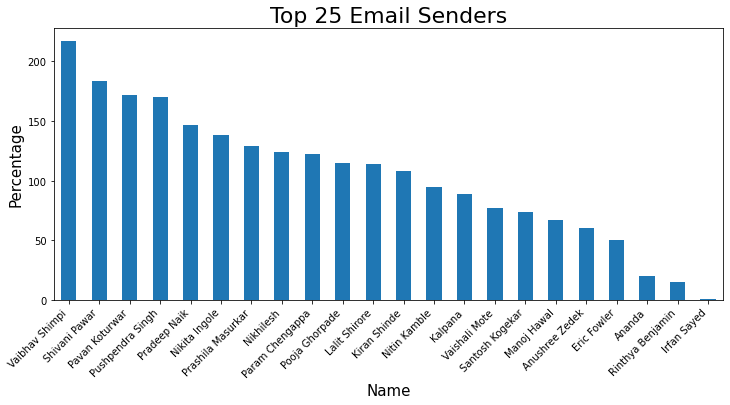

In [30]:
df2['Sender_name'].value_counts().nlargest(25).plot.bar(figsize=(12,5))
plt.title("Top 25 Email Senders",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Name",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

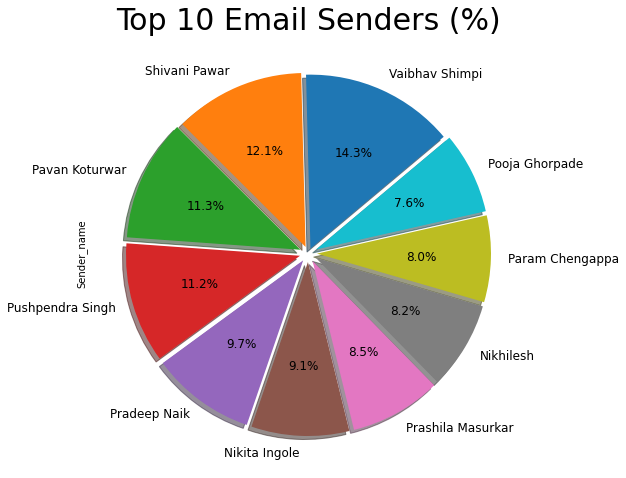

In [31]:
df2["Sender_name"].value_counts()[:10].plot.pie(figsize=(10,8),
                                                explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
                                                shadow=True, startangle=40,autopct='%1.1f%%',fontsize=12)
plt.title("Top 10 Email Senders (%)",fontsize=30)
plt.show()

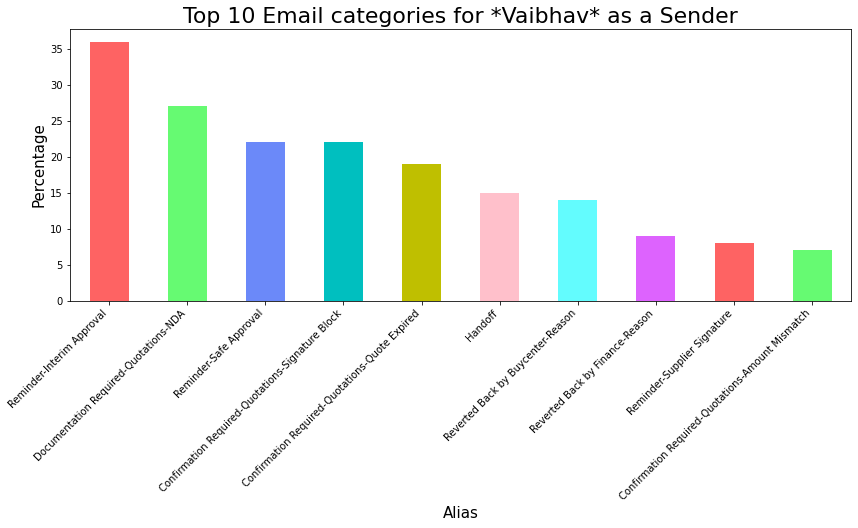

In [32]:
sender1= df2[df2['Sender_name']=='Vaibhav Shimpi']
sender1['Email_Category'].value_counts().nlargest(10).plot.bar(figsize=(14,5),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.title("Top 10 Email categories for *Vaibhav* as a Sender",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

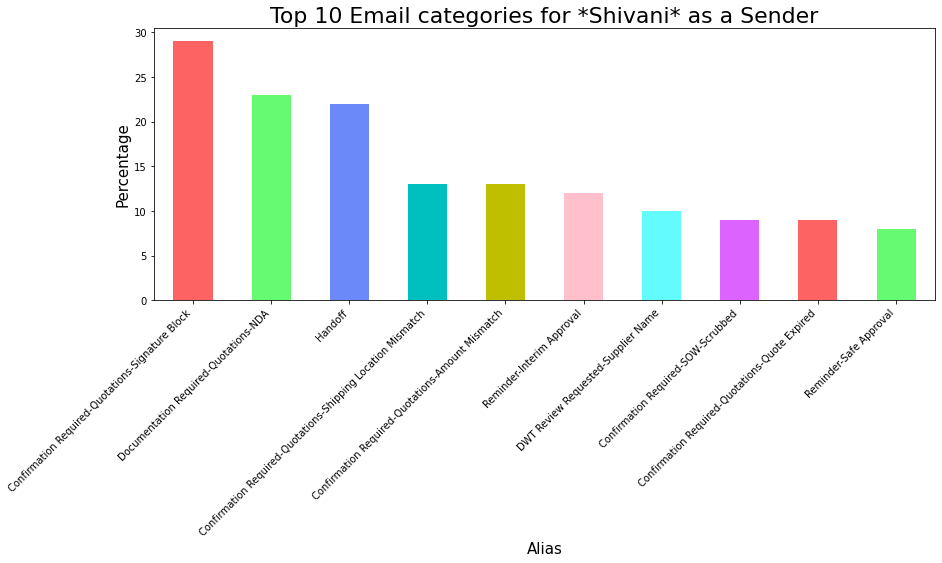

In [33]:
sender2= df2[df2['Sender_name']=='Shivani Pawar']
sender2['Email_Category'].value_counts().nlargest(10).plot.bar(figsize=(14,5),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.title("Top 10 Email categories for *Shivani* as a Sender",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

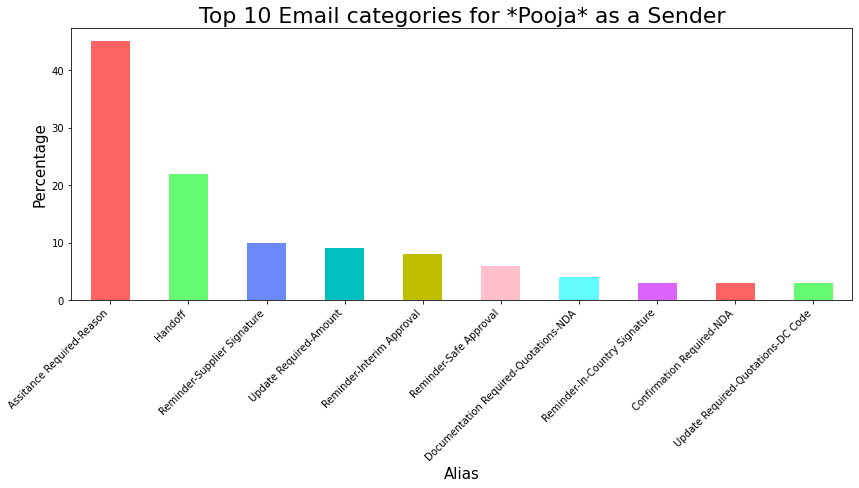

In [34]:
sender3= df2[df2['Sender_name']=='Pooja Ghorpade']
sender3['Email_Category'].value_counts().nlargest(10).plot.bar(figsize=(14,5),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.title("Top 10 Email categories for *Pooja* as a Sender",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Alias",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

### In Nutshell--

#### Total Email Flow For the Month of September--> 6875
#### Total Emails Triggred By TCS Team --> 2288
#### Top 3 Email Categories
1. Assitance Required-Reason
2. Confirmation Required-Quotations-Signature Block
3. Documentation Required-Quotations-NDA

#### Top 3 Overall Email Recipients
1. Neda
2. cmioclm
3. lyretall

#### Top 3 Email Senders
1. Vaibhav
2. Shivani
3. Pavan

In [ ]:
pd.DataFrame